# Importing Libraries and Dataset

In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 500)
warnings.simplefilter(action='ignore', category=Warning)

In [2]:
df = pd.read_csv('screentime_analysis.csv')
df.head()

,Date,App,Usage (minutes),Notifications,Times Opened
0,2024-08-07,Instagram,81,24,57
1,2024-08-08,Instagram,90,30,53
2,2024-08-26,Instagram,112,33,17
3,2024-08-22,Instagram,82,11,38
4,2024-08-12,Instagram,59,47,16


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date             200 non-null    object
 1   App              200 non-null    object
 2   Usage (minutes)  200 non-null    int64 
 3   Notifications    200 non-null    int64 
 4   Times Opened     200 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 7.9+ KB


In [4]:
df.isnull().sum().sum()

0

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df['Date'].min(), df['Date'].max()

(Timestamp('2024-08-01 00:00:00'), Timestamp('2024-08-30 00:00:00'))

In [6]:
df.columns

Index(['Date', 'App', 'Usage (minutes)', 'Notifications', 'Times Opened'], dtype='object')

In [7]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,200,2024-08-16 17:16:48,2024-08-01 00:00:00,2024-08-09 00:00:00,2024-08-18 00:00:00,2024-08-25 00:00:00,2024-08-30 00:00:00,NaN
Usage (minutes),200.0,37.75,1.0,17.0,26.0,51.25,119.0,29.711299
Notifications,200.0,28.735,0.0,1.75,11.5,47.0,147.0,35.801726
Times Opened,200.0,21.63,1.0,4.0,10.0,32.0,99.0,24.27301


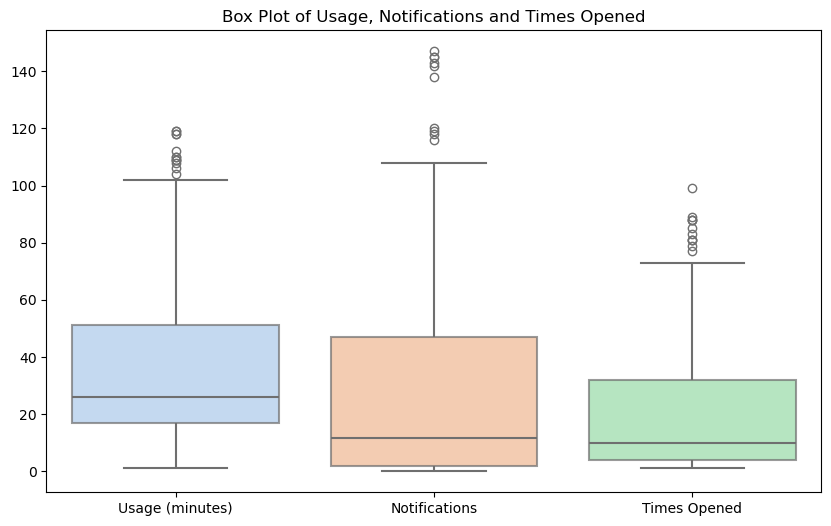

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
columns = ['Usage (minutes)', 'Notifications', 'Times Opened']
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[columns], palette="pastel", linewidth=1.5, boxprops=dict(alpha=0.7))
plt.title("Box Plot of Usage, Notifications and Times Opened")
plt.show()

As we can observe from this box plot, the Usage has the highest mean time in minutes in people's
screen time.

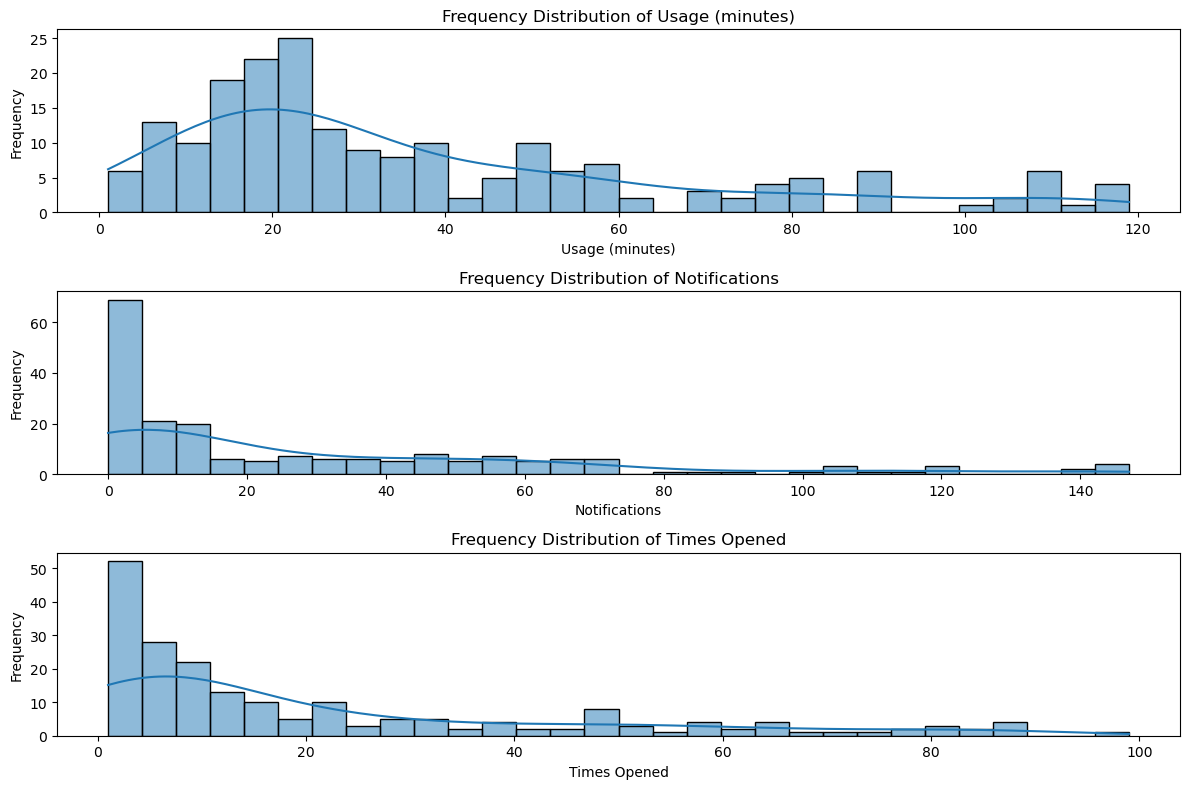

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
columns = ['Usage (minutes)', 'Notifications', 'Times Opened']
plt.figure(figsize=(12, 8))
for i, col in enumerate(columns, 1):
    plt.subplot(3, 1, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Frequency Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

From this frequency distribution graphs we can oberserve, that all of the columns i.e Usage,
times opened, and notification follow right skewed normal distribution with usage having the highest
mean time in minutes.

In [10]:
df['App'].value_counts()

App
Instagram      25
X              25
WhatsApp       25
8 Ball Pool    25
Safari         25
Netflix        25
Facebook       25
LinkedIn       25
Name: count, dtype: int64

In [11]:
df['day_of_week'] = df['Date'].dt.dayofweek
df["is_wknd"] = df['Date'].dt.weekday // 5

In [12]:
df_days = df.groupby(['is_wknd','day_of_week']).agg({'Usage (minutes)':'mean','Notifications':'mean',
'Times Opened':'mean'})

In [13]:
df_days.reset_index(inplace=True)

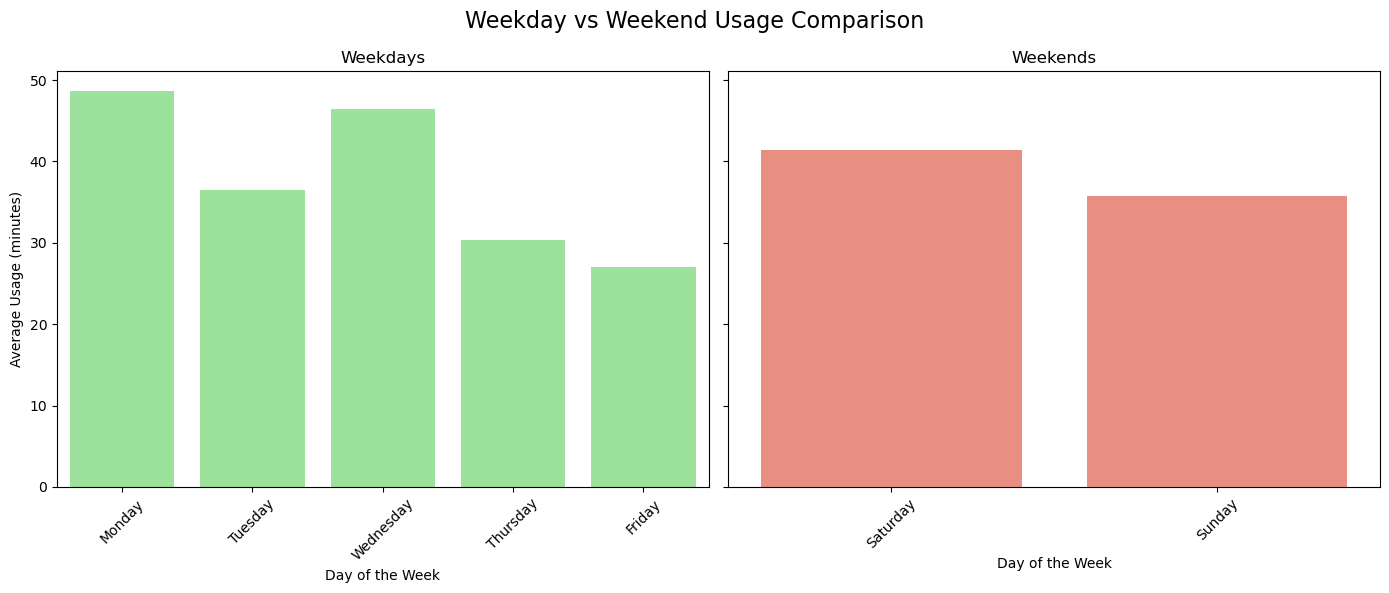

In [14]:
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_days['day_of_week'] = df_days['day_of_week'].map(day_names)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
fig.suptitle("Weekday vs Weekend Usage Comparison", fontsize=16)
sns.barplot(data=df_days[df_days['is_wknd'] == 0], x='day_of_week', y='Usage (minutes)', ax=axes[0], color='lightgreen')
axes[0].set_title("Weekdays")
axes[0].set_xlabel("Day of the Week")
axes[0].set_ylabel("Average Usage (minutes)")
axes[0].tick_params(axis='x', rotation=45)
sns.barplot(data=df_days[df_days['is_wknd'] == 1], x='day_of_week', y='Usage (minutes)', ax=axes[1], color='salmon')
axes[1].set_title("Weekends")
axes[1].set_xlabel("Day of the Week")
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

From this comparsion between the screen time on weekdays and weekends for usage shows us that 
people have a higher screen time on weekdays on an average than on the weekends, particularly 
monday and wednesday having the highest screen time in the whole week.

In [15]:
df_days

,is_wknd,day_of_week,Usage (minutes),Notifications,Times Opened
0,0,Monday,48.636364,31.363636,19.727273
1,0,Tuesday,36.541667,43.750000,25.500000
2,0,Wednesday,46.500000,31.272727,24.181818
3,0,Thursday,30.406250,19.093750,18.593750
4,0,Friday,27.085714,32.485714,24.285714
5,1,Saturday,41.441176,23.941176,24.294118
6,1,Sunday,35.750000,20.600000,13.000000


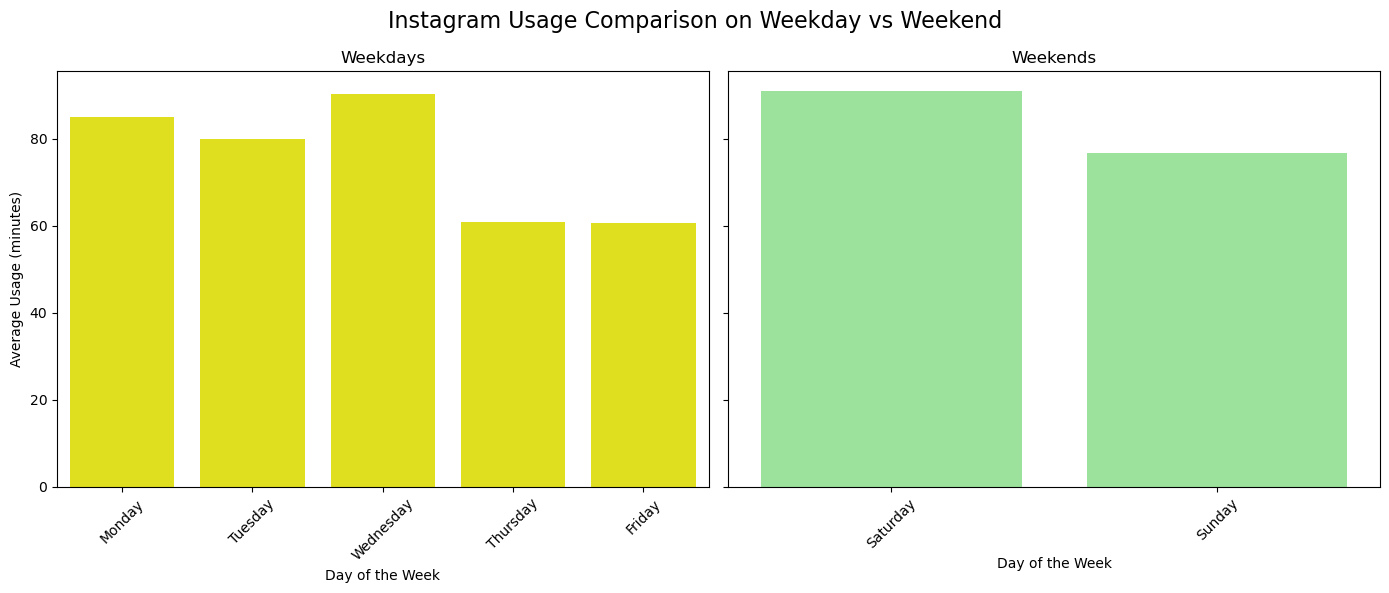

In [16]:
df_insta = df[df['App']=='Instagram']
df_days = df_insta.groupby(['is_wknd','day_of_week']).agg({'Usage (minutes)':'mean',
                                           'Notifications':'mean',
                                           'Times Opened':'mean'})
df_days.reset_index(inplace=True)
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_days['day_of_week'] = df_days['day_of_week'].map(day_names)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
fig.suptitle("Instagram Usage Comparison on Weekday vs Weekend", fontsize=16)
sns.barplot(data=df_days[df_days['is_wknd'] == 0], x='day_of_week', y='Usage (minutes)', ax=axes[0], color='yellow')
axes[0].set_title("Weekdays")
axes[0].set_xlabel("Day of the Week")
axes[0].set_ylabel("Average Usage (minutes)")
axes[0].tick_params(axis='x', rotation=45)
sns.barplot(data=df_days[df_days['is_wknd'] == 1], x='day_of_week', y='Usage (minutes)', ax=axes[1], color='lightgreen')
axes[1].set_title("Weekends")
axes[1].set_xlabel("Day of the Week")
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

From this comparsion between the screen time on weekdays and weekends for instagram shows us that 
people have a higher screen time on weekends on an average than on the weekdays, particularly 
saturday having the highest screen time on insatgram in the whole week.

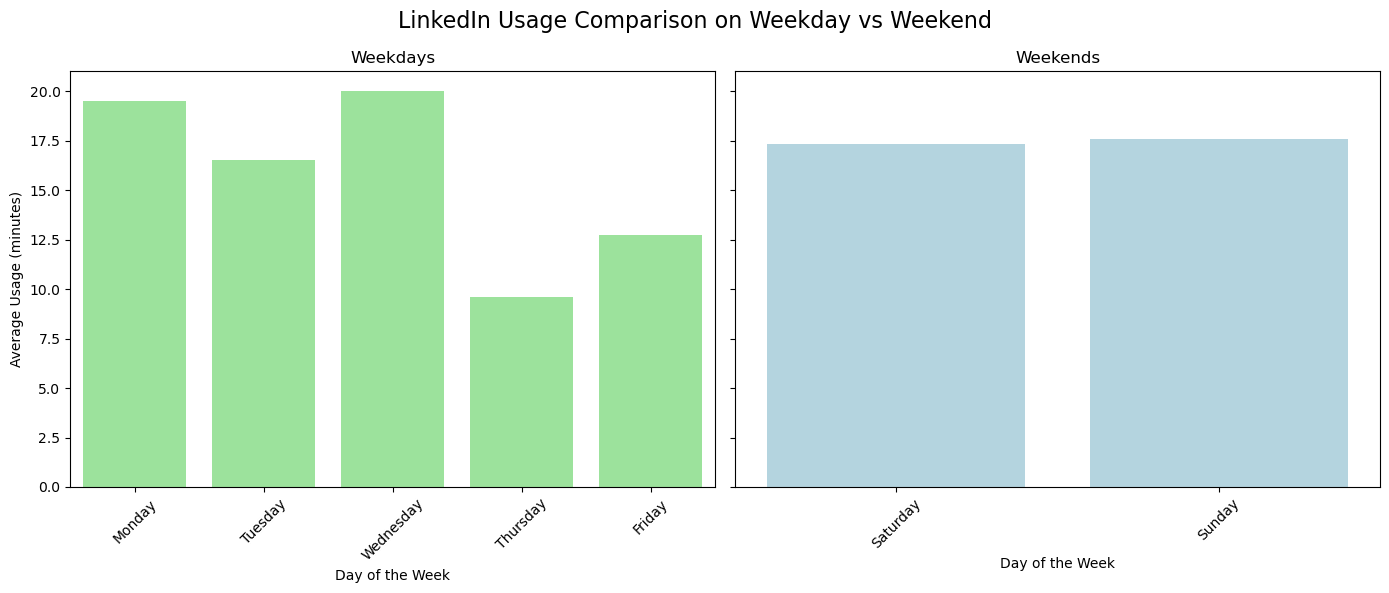

In [17]:
df_linkedin = df[df['App']=='LinkedIn']
df_days = df_linkedin.groupby(['is_wknd','day_of_week']).agg({'Usage (minutes)':'mean',
                                           'Notifications':'mean',
                                           'Times Opened':'mean'})
df_days.reset_index(inplace=True)
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_days['day_of_week'] = df_days['day_of_week'].map(day_names)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
fig.suptitle("LinkedIn Usage Comparison on Weekday vs Weekend", fontsize=16)
sns.barplot(data=df_days[df_days['is_wknd'] == 0], x='day_of_week', y='Usage (minutes)', ax=axes[0], color='lightgreen')
axes[0].set_title("Weekdays")
axes[0].set_xlabel("Day of the Week")
axes[0].set_ylabel("Average Usage (minutes)")
axes[0].tick_params(axis='x', rotation=45)
sns.barplot(data=df_days[df_days['is_wknd'] == 1], x='day_of_week', y='Usage (minutes)', ax=axes[1], color='lightblue')
axes[1].set_title("Weekends")
axes[1].set_xlabel("Day of the Week")
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

From this comparsion between the screen time on weekdays and weekends for Linkedln shows us that 
people have a higher screen time on weekdays on an average than on the weekends, particullary 
monday , tuesday and wednesday having the highest screen time in the whole week.

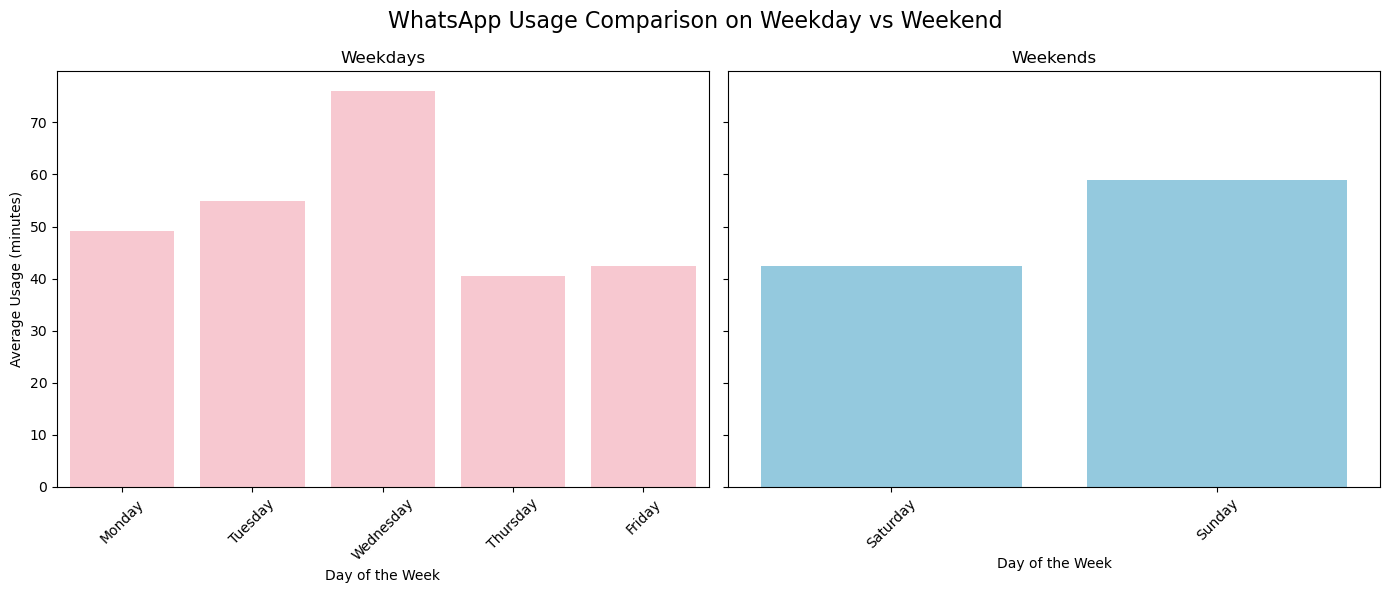

In [18]:
df_whatsapp = df[df['App']=='WhatsApp']
df_days = df_whatsapp.groupby(['is_wknd','day_of_week']).agg({'Usage (minutes)':'mean',
                                           'Notifications':'mean',
                                           'Times Opened':'mean'})
df_days.reset_index(inplace=True)
day_names = {0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday'}
df_days['day_of_week'] = df_days['day_of_week'].map(day_names)
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
fig.suptitle("WhatsApp Usage Comparison on Weekday vs Weekend", fontsize=16)
sns.barplot(data=df_days[df_days['is_wknd'] == 0], x='day_of_week', y='Usage (minutes)', ax=axes[0], color='pink')
axes[0].set_title("Weekdays")
axes[0].set_xlabel("Day of the Week")
axes[0].set_ylabel("Average Usage (minutes)")
axes[0].tick_params(axis='x', rotation=45)
sns.barplot(data=df_days[df_days['is_wknd'] == 1], x='day_of_week', y='Usage (minutes)', ax=axes[1], color='skyblue')
axes[1].set_title("Weekends")
axes[1].set_xlabel("Day of the Week")
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

From this comparsion between the screen time on weekdays and weekends for whatsapp shows us that 
people have a similar usage of whatsapp on weekends and weekdays with wednesday having the highest 
usage in the week.

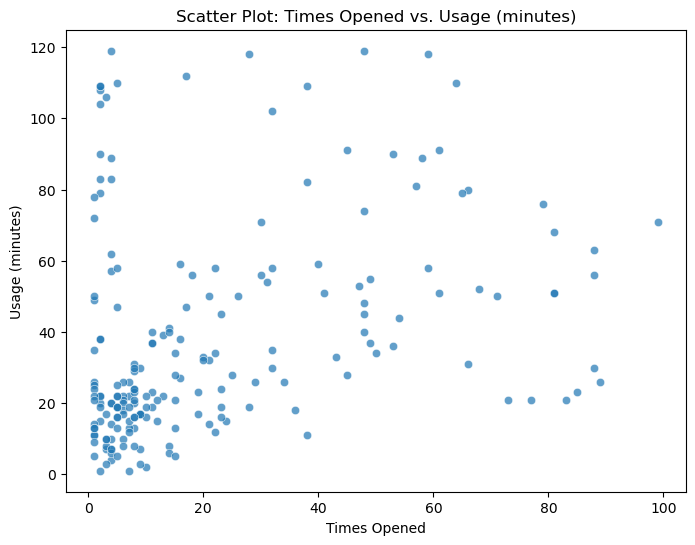

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = "screentime_analysis.csv"  # Update this path if necessary
df = pd.read_csv(file_path)

# Scatter plot for Usage (minutes) vs. Times Opened
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["Times Opened"], y=df["Usage (minutes)"], alpha=0.7)
plt.xlabel("Times Opened")
plt.ylabel("Usage (minutes)")
plt.title("Scatter Plot: Times Opened vs. Usage (minutes)")
plt.show()

The scatter plot of Times Opened vs. Usage (minutes) reveals a positive correlation, indicating that apps opened more frequently tend to have higher usage time. However, some points deviate from this trend, suggesting certain apps are used for extended periods despite being opened fewer times, likely streaming or reading apps. Conversely, some apps may be opened frequently but used for short durations, possibly messaging or notification-driven apps. Outliers in the plot highlight extreme cases where an app was either heavily used in a single session or frequently accessed with minimal engagement per session.

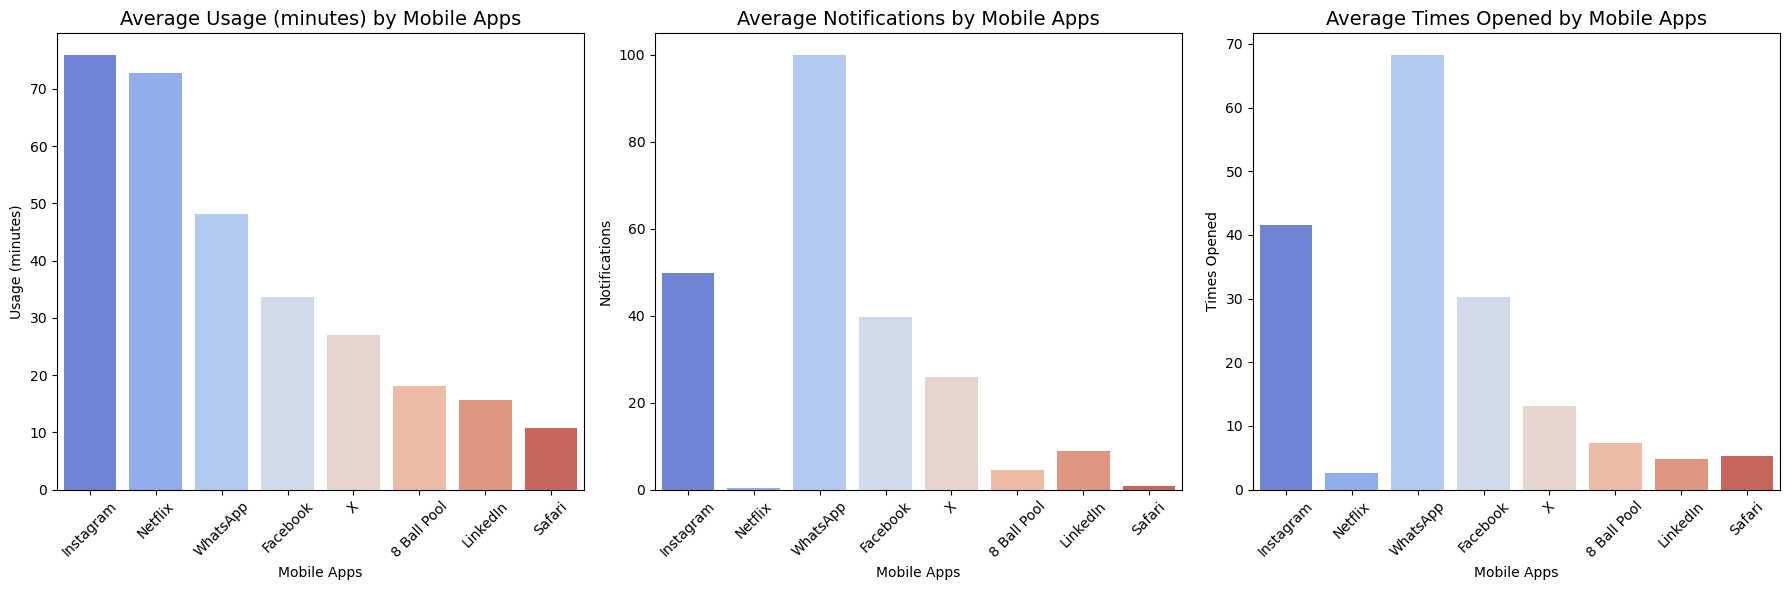

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
df_app = df.groupby('App').agg({
    'Usage (minutes)': 'mean',
    'Notifications': 'mean',
    'Times Opened': 'mean'
}).reset_index().sort_values(by='Usage (minutes)', ascending=False)
unique_apps = df_app['App'].unique()
app_colors = {app: sns.color_palette("coolwarm", len(unique_apps))[i] for i, app in enumerate(unique_apps)}
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # 1 row, 3 columns
metrics = ['Usage (minutes)', 'Notifications', 'Times Opened']
for i, metric in enumerate(metrics):
    sns.barplot(
        data=df_app,
        x='App',
        y=metric,
        ax=axes[i],
        palette=[app_colors[app] for app in df_app['App']]
    )
    axes[i].set_title(f'Average {metric} by Mobile Apps', fontsize=14)
    axes[i].set_xlabel('Mobile Apps')
    axes[i].set_ylabel(metric)
    axes[i].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

From these usage , times opened, notifications vs different apps we can conclude that on an average 
in usage Instagram , Netflix are ussed the most, in notifications Whatsapp and then Instagram has the
highest screen time, and in average time opened again Whatsapp and instagram have the highest screen
time.

## Heatmap of App Usage

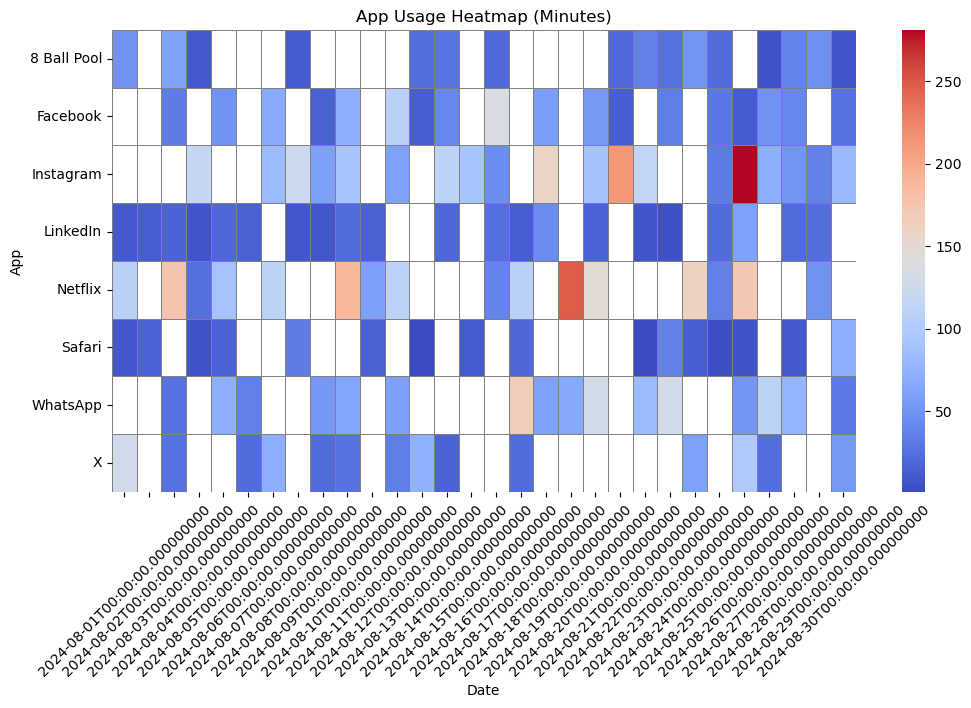

In [21]:

# Load the dataset
file_path = "screentime_analysis.csv"  # Update this path if necessary
df = pd.read_csv(file_path)

# Convert Date column to datetime
df["Date"] = pd.to_datetime(df["Date"])

# Pivot the data to have dates as columns, apps as rows, and usage as values
heatmap_data = df.pivot_table(index="App", columns="Date", values="Usage (minutes)", aggfunc="sum")

# Create the heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap="coolwarm", linewidths=0.5, linecolor="gray")

# Labels and title
plt.title("App Usage Heatmap (Minutes)")
plt.xlabel("Date")
plt.ylabel("App")
plt.xticks(rotation=45)
plt.yticks(rotation=0)

# Show the heatmap plot
plt.show()


The heatmap reveals distinct usage patterns, where certain apps exhibit consistently high engagement over multiple days, possibly indicating frequent social media or entertainment use. Some dates show overall higher usage, suggesting weekends, holidays, or special events influencing screen time. A few apps display fluctuating trends, with noticeable increases or decreases in usage over time, reflecting changing user habits. Additionally, some apps may have concentrated peak usage on specific dates, while others maintain steady engagement throughout the period.

## Pair Plot of Numerical Features

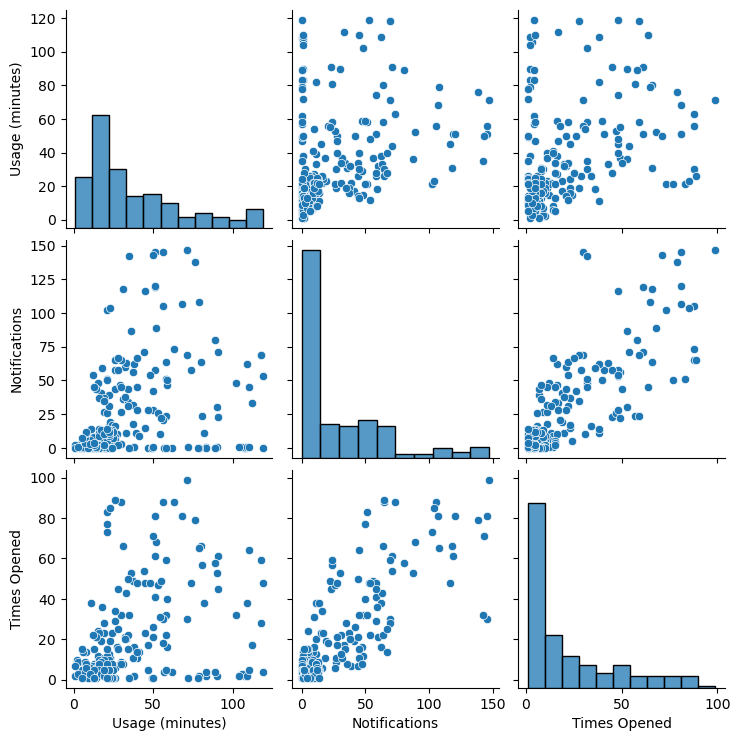

In [22]:

# Generate a pair plot for numerical columns
sns.pairplot(df[["Usage (minutes)", "Notifications", "Times Opened"]])
plt.show()


The pair plot highlights strong correlations between key variables. A positive relationship between Usage (minutes) and Times Opened suggests that frequently accessed apps tend to have higher total usage. Similarly, a correlation between Notifications and Times Opened indicates that apps sending more notifications are opened more often. The presence of outliers suggests days with exceptionally high or low usage, possibly due to unusual user behavior. Clusters in the scatter plots differentiate apps based on engagement levels, revealing distinct patterns between high-usage and low-usage applications.